In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6205, done.
remote: Total 6205 (delta 0), reused 0 (delta 0), pack-reused 6205
Receiving objects: 100% (6205/6205), 13.47 MiB | 36.48 MiB/s, done.
Resolving deltas: 100% (4200/4200), done.


In [ ]:
%cd keras-retinanet/
!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=168011 sha256=a4a9bf11a135c38335648b2ec2825652c8b2f1ae5e838080dbd4ab51ff30332d
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=16e35ba3e980acd1d26715c252c99b49ebe9bb228eb87da156cb7416e98f24d1
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-retinanet keras-resnet


In [ ]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/keras_retinanet
creating build/temp.linux-x86_64-3.7/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-a56wZI/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-a56wZI/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import requests
import urllib
import os
from PIL import Image
import xml.etree.ElementTree as et
import os
from pathlib import Path
import glob

from keras_retinanet import models
from keras_retinanet.utils.image import preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with os.scandir('/content/drive/MyDrive/garbage-detector/dirty-locations/training') as entries:
    for entry in entries:
        print(entry.name)

images (100).xml
images (90).xml
images (88).xml
descărcare (3).xml
descărcare(2).xml
descărcare.xml
descărcare (21).xml
descărcare (20).xml
descărcare (17).xml
descărcare (16).xml
descărcare (15).xml
descărcare (14).xml
descărcare (13).xml
descărcare (12).xml
descărcare (11).xml
descărcare (10).xml
descărcare (8).xml
descărcare (7).xml
descărcare (5).xml
descărcare (4).xml
images (27).xml
images (25).xml
images (24).xml
images (22).xml
images (20) (1).xml
images (19).xml
images (18).xml
images (17).xml
images (16).xml
images (15).xml
images (14).xml
images (13).xml
images (12).xml
images (11).xml
images (10).xml
images (9).xml
images (8).xml
images (7).xml
images (6).xml
images (5).xml
images (4).xml
images (3).xml
images (2).xml
images (63).xml
images (61).xml
images (60).xml
images (59).xml
images (58).xml
images (52).xml
images (51).xml
images (48).xml
images (47).xml
images (46).xml
images (45).xml
images (44).xml
images (42).xml
images (41).xml
images (40).xml
im

In [ ]:
#for name in glob.glob('/content/drive/MyDrive/garbage-detector/dirty-locations/*.xml'): 
#    print(name) 

print(glob.glob('/content/drive/MyDrive/garbage-detector/dirty-locations/training/*.xml'))

['/content/drive/MyDrive/garbage-detector/dirty-locations/training/descărcare(2).xml', '/content/drive/MyDrive/garbage-detector/dirty-locations/training/descărcare (3).xml', '/content/drive/MyDrive/garbage-detector/dirty-locations/training/descărcare (4).xml', '/content/drive/MyDrive/garbage-detector/dirty-locations/training/descărcare (5).xml', '/content/drive/MyDrive/garbage-detector/dirty-locations/training/descărcare (7).xml', '/content/drive/MyDrive/garbage-detector/dirty-locations/training/descărcare (8).xml', '/content/drive/MyDrive/garbage-detector/dirty-locations/training/descărcare (10).xml', '/content/drive/MyDrive/garbage-detector/dirty-locations/training/descărcare (11).xml', '/content/drive/MyDrive/garbage-detector/dirty-locations/training/descărcare (12).xml', '/content/drive/MyDrive/garbage-detector/dirty-locations/training/descărcare (13).xml', '/content/drive/MyDrive/garbage-detector/dirty-locations/training/descărcare (14).xml', '/content/drive/MyDrive/gar

In [ ]:
filenames =  glob.glob("/content/drive/MyDrive/garbage-detector/dirty-locations/training/*.xml") #Change to your filepath
print(filenames[1])
filename = [] 
trainingRoots=[]
for filename in filenames:
  parsed_xml=et.parse(filename)
  #roots.append( parsed_xml.getroot())
  trainingRoots.append(parsed_xml.getroot())

/content/drive/MyDrive/garbage-detector/dirty-locations/training/images (90).xml


In [ ]:
filenames =  glob.glob("/content/drive/MyDrive/garbage-detector/dirty-locations/test/*.xml") #Change to your filepath
print(filenames[1])
filename = [] 
testRoots=[]
for filename in filenames:
  parsed_xml=et.parse(filename)
  #roots.append( parsed_xml.getroot())
  testRoots.append(parsed_xml.getroot())

/content/drive/MyDrive/garbage-detector/dirty-locations/test/images (73).xml


In [ ]:
path = roots[0].find('path').text
print(path)

objects = roots[0].findall('object')
for obj in objects:
  xmin = obj.find('bndbox').find('xmin').text
  print(xmin)
# for child in roots[0].findall('path'):
   #print(child.find('path').text)

NameError: ignored

In [ ]:
for root in roots:
  print(root.find('path').text)

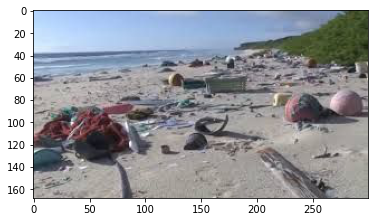

In [ ]:
im = Image.open('/content/drive/MyDrive/garbage-detector/dataset_beach/training_set/dirty/descărcare (4).jpg')
plt.imshow(im)

In [ ]:
converted_data_train = {
    'image_name': [],
    'x_min': [],
    'y_min': [],
    'x_max': [],
    'y_max': [],
    'class_name': [],
}

converted_data_test = {
    'image_name': [],
    'x_min': [],
    'y_min': [],
    'x_max': [],
    'y_max': [],
    'class_name': [],
}

In [ ]:
#for training data
for trainingRoot in trainingRoots:
  for obj in trainingRoot.findall('object'):
    converted_data_train['image_name'].append(trainingRoot.find('path').text)
    xmin = obj.find('bndbox').find('xmin').text
    ymin = obj.find('bndbox').find('ymin').text
    xmax = obj.find('bndbox').find('xmax').text
    ymax = obj.find('bndbox').find('ymax').text
    converted_data_train['x_min'].append(xmin)
    converted_data_train['y_min'].append(ymin)
    converted_data_train['x_max'].append(xmax)
    converted_data_train['y_max'].append(ymax)
    converted_data_train['class_name'].append('garbage')

In [ ]:
train_df = pd.DataFrame(converted_data_train)
train_df.head()

,image_name,x_min,y_min,x_max,y_max,class_name
0,/content/drive/MyDrive/garbage-detector/datase...,154,83,216,183,garbage
1,/content/drive/MyDrive/garbage-detector/datase...,32,90,249,150,garbage
2,/content/drive/MyDrive/garbage-detector/datase...,1,74,121,100,garbage
3,/content/drive/MyDrive/garbage-detector/datase...,47,98,188,138,garbage
4,/content/drive/MyDrive/garbage-detector/datase...,66,155,133,183,garbage


In [ ]:
#for test data
for testRoot in testRoots:
  for obj in testRoot.findall('object'):
    converted_data_test['image_name'].append(testRoot.find('path').text)
    xmin = obj.find('bndbox').find('xmin').text
    ymin = obj.find('bndbox').find('ymin').text
    xmax = obj.find('bndbox').find('xmax').text
    ymax = obj.find('bndbox').find('ymax').text
    converted_data_test['x_min'].append(xmin)
    converted_data_test['y_min'].append(ymin)
    converted_data_test['x_max'].append(xmax)
    converted_data_test['y_max'].append(ymax)
    converted_data_test['class_name'].append('garbage')

In [ ]:
test_df = pd.DataFrame(converted_data_test)
test_df.head()

,image_name,x_min,y_min,x_max,y_max,class_name
0,/content/drive/MyDrive/garbage-detector/datase...,3,57,149,89,garbage
1,/content/drive/MyDrive/garbage-detector/datase...,174,52,273,91,garbage
2,/content/drive/MyDrive/garbage-detector/datase...,161,103,216,131,garbage
3,/content/drive/MyDrive/garbage-detector/datase...,64,156,108,183,garbage
4,/content/drive/MyDrive/garbage-detector/datase...,204,147,266,176,garbage


In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
  layer.trainable = False
  

NameError: ignored

In [ ]:
train_df.shape

(483, 6)

In [ ]:
train_df[train_df['image_name']=='/content/drive/MyDrive/garbage-detector/dataset_beach/training_set/dirty/images (72).jpg']

,image_name,x_min,y_min,x_max,y_max,class_name
432,/content/drive/MyDrive/garbage-detector/datase...,56,117,100,138,garbage
433,/content/drive/MyDrive/garbage-detector/datase...,105,129,156,156,garbage
434,/content/drive/MyDrive/garbage-detector/datase...,13,145,38,161,garbage
435,/content/drive/MyDrive/garbage-detector/datase...,122,86,143,102,garbage
436,/content/drive/MyDrive/garbage-detector/datase...,75,87,107,102,garbage
437,/content/drive/MyDrive/garbage-detector/datase...,126,57,153,75,garbage
438,/content/drive/MyDrive/garbage-detector/datase...,158,44,225,72,garbage
439,/content/drive/MyDrive/garbage-detector/datase...,196,99,233,123,garbage


In [ ]:
def show_image_with_boxes(df):
  # pick a random image
  filepath = df.sample()['image_name'].values[0]

  # get all rows for this image
  df2 = df[df['image_name'] == filepath]
  im = np.array(Image.open(filepath))

  # if there's a PNG it will have alpha channel
  im = im[:,:,:3]

  for idx, row in df2.iterrows():
    box = [
      row['x_min'],
      row['y_min'],
      row['x_max'],
      row['y_max'],
    ]
    print(box)
    draw_box(im, box, color=(255, 0, 0))

  plt.axis('off')
  plt.imshow(im)
  plt.show()

['56', '117', '100', '138']
['105', '129', '156', '156']
['13', '145', '38', '161']
['122', '86', '143', '102']
['75', '87', '107', '102']
['126', '57', '153', '75']
['158', '44', '225', '72']
['196', '99', '233', '123']


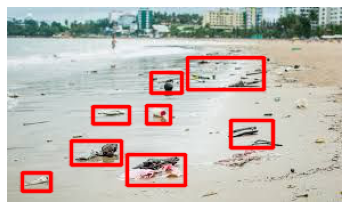

In [ ]:
show_image_with_boxes(train_df)

In [ ]:
train_df.to_csv('annotations.csv', index=False, header=None)

In [ ]:
classes = ['garbage']
with open('classes.csv', 'w') as f:
  for i, class_name in enumerate(classes):
    f.write(f'{class_name},{i}\n')

In [ ]:
!head classes.csv

garbage,0


In [ ]:
!head annotations.csv

/content/drive/MyDrive/garbage-detector/dataset_beach/training_set/dirty/images (100).jpg,154,83,216,183,garbage
/content/drive/MyDrive/garbage-detector/dataset_beach/training_set/dirty/images (90).jpg,32,90,249,150,garbage
/content/drive/MyDrive/garbage-detector/dataset_beach/training_set/dirty/images (90).jpg,1,74,121,100,garbage
/content/drive/MyDrive/garbage-detector/dataset_beach/training_set/dirty/images (88).jpg,47,98,188,138,garbage
/content/drive/MyDrive/garbage-detector/dataset_beach/training_set/dirty/images (88).jpg,66,155,133,183,garbage
/content/drive/MyDrive/garbage-detector/dataset_beach/training_set/dirty/images (88).jpg,166,135,262,162,garbage
/content/drive/MyDrive/garbage-detector/dataset_beach/training_set/dirty/images (88).jpg,183,79,275,129,garbage
/content/drive/MyDrive/garbage-detector/dataset_beach/training_set/dirty/descărcare (3).jpg,41,112,145,162,garbage
/content/drive/MyDrive/garbage-detector/dataset_beach/training_set/dirty/descărcare (3).jpg,21,82,92,12

In [ ]:
if not os.path.exists('snapshots'):
  os.mkdir('snapshots')

In [ ]:
PRETRAINED_MODEL = 'snapshots/_pretrained_model.h5'

URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to snapshots/_pretrained_model.h5


In [ ]:
!ls

annotations.csv  CONTRIBUTORS.md  keras_retinanet  requirements.txt  snapshots
build		 examples	  LICENSE	   setup.cfg	     tests
classes.csv	 images		  README.md	   setup.py


In [ ]:
batch_size = 8
num_images = len(train_df.groupby('image_name'))
steps_per_epoch = num_images // batch_size + 1
steps_per_epoch

12

In [ ]:
!keras_retinanet/bin/train.py --freeze-backbone \
  --random-transform \
  --weights {PRETRAINED_MODEL} \
  --batch-size {batch_size} \
  --steps {steps_per_epoch} \
  --epochs 15 \
  csv annotations.csv classes.csv

2021-03-11 15:07:25.821802: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Creating model, this may take a second...
2021-03-11 15:07:50.055645: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-03-11 15:07:50.056700: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-11 15:07:50.123810: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-03-11 15:07:50.124379: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-03-11 15:07:50.124414: I tensorflow/

In [ ]:
!ls snapshots

_pretrained_model.h5  resnet50_csv_06.h5  resnet50_csv_12.h5
resnet50_csv_01.h5    resnet50_csv_07.h5  resnet50_csv_13.h5
resnet50_csv_02.h5    resnet50_csv_08.h5  resnet50_csv_14.h5
resnet50_csv_03.h5    resnet50_csv_09.h5  resnet50_csv_15.h5
resnet50_csv_04.h5    resnet50_csv_10.h5
resnet50_csv_05.h5    resnet50_csv_11.h5


In [ ]:
from glob import glob
model_paths = glob('snapshots/resnet50_csv_*.h5')
latest_path = sorted(model_paths)[-1]
print("path:", latest_path)

model = models.load_model(latest_path, backbone_name='resnet50')
model = models.convert_model(model)

label_map = {}
for line in open('classes.csv'):
  row = line.rstrip().split(',')
  label_map[int(row[1])] = row[0]

path: snapshots/resnet50_csv_15.h5


In [ ]:
def show_image_with_predictions(df, threshold=0.6):
  # choose a random image
  row = df.sample()
  filepath = row['image_name'].values[0]
  print("filepath:", filepath)

  # get all rows for this image
  df2 = df[df['image_name'] == filepath]
  im = np.array(Image.open(filepath))
  print("im.shape:", im.shape)

  # if there's a PNG it will have alpha channel
  im = im[:,:,:3]

  # plot true boxes
  for idx, row in df2.iterrows():
    box = [
      row['x_min'],
      row['y_min'],
      row['x_max'],
      row['y_max'],
    ]
    print(box)
    draw_box(im, box, color=(255, 0, 0))
  
  ### plot predictions ###

  # get predictions
  imp = preprocess_image(im)
  imp, scale = resize_image(im)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(imp, axis=0)
  )

  # standardize box coordinates
  boxes /= scale

  # loop through each prediction for the input image
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can quit as soon
    # as we see a score below threshold
    if score < threshold:
      break

    box = box.astype(np.int32)
    color = label_color(label)
    draw_box(im, box, color=color)

    class_name = label_map[label]
    caption = f"{class_name} {score:.3f}"
    draw_caption(im, box, caption)

  plt.axis('off')
  plt.imshow(im)
  plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]

filepath: /content/drive/MyDrive/garbage-detector/dataset_beach/training_set/dirty/descărcare (14).jpg
im.shape: (159, 318, 3)
['208', '124', '276', '159']
['70', '124', '169', '159']
['84', '59', '119', '77']
['155', '94', '179', '110']
['200', '101', '222', '119']
['144', '78', '163', '93']
['94', '49', '115', '59']
['118', '33', '141', '45']
['159', '41', '175', '57']
['135', '17', '161', '25']
['110', '14', '129', '26']
['224', '102', '257', '115']
['190', '65', '228', '84']
['284', '117', '316', '143']


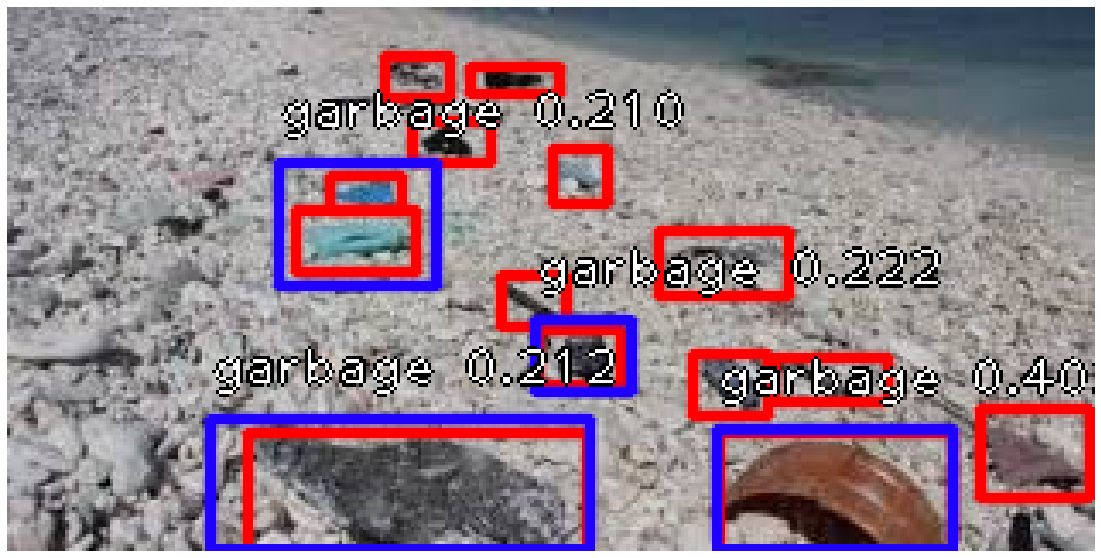

In [ ]:
show_image_with_predictions(train_df, threshold=0.2)

filepath: /content/drive/MyDrive/garbage-detector/dataset_beach/test_set/dirty/AnyConv.com__descărcare (9).jpg
im.shape: (182, 277, 3)
['1', '129', '80', '161']
['113', '84', '183', '124']
['99', '59', '142', '84']
['186', '73', '221', '83']
['243', '41', '265', '78']
['55', '98', '88', '117']


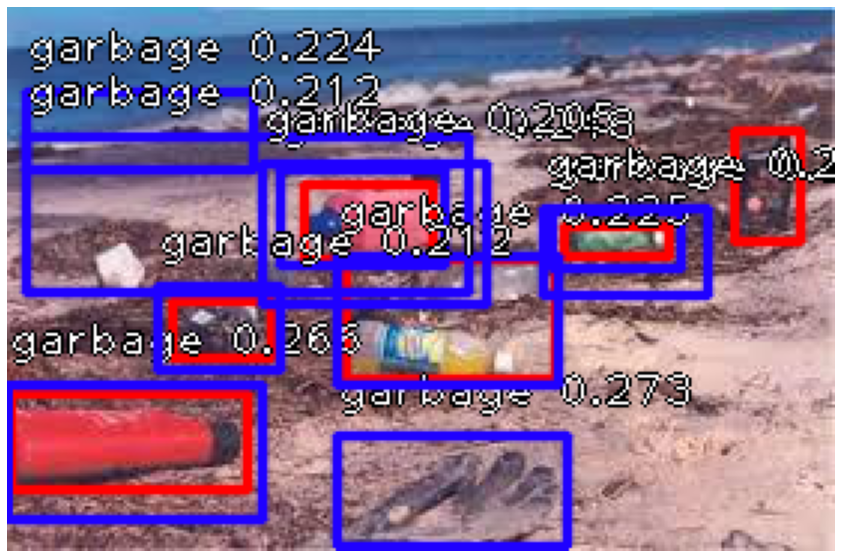

In [ ]:
show_image_with_predictions(test_df, threshold=0.2)